# Logistic Regression 

In this project, I implement a Logistic Regression model from scratch to classify customer behavior.
Logistic Regression predicts probabilities and maps them to binary classes using a sigmoid function.

# Strengths:
Works well for binary classification problems
Probabilistic interpretation
Simple and fast

# Limitations:
Assumes linearity between input features and the log-odds
Struggles with highly correlated features or outliers

The learning process involves minimizing cross-entropy loss by updating model weights iteratively.

# 📚 Step 1: Data Creation

In this stage, I manually implemented the Logistic Regression model from scratch, including weight updates, gradient calculations, and loss tracking.
Therefore, I did not import LogisticRegression from sklearn.linear_model.
All model training, prediction, and evaluation steps were built manually.

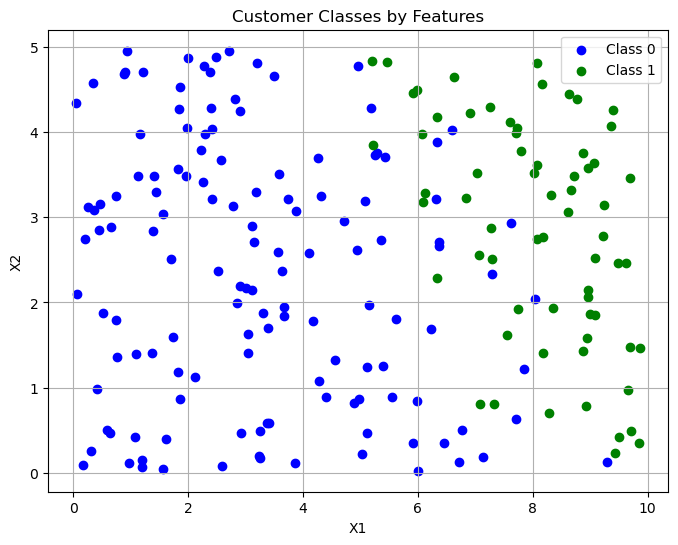

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from sklearn.model_selection import KFold
import seaborn as sns

# Set random seed
np.random.seed(42)
n_samples = 200

# Create features
X1 = np.random.rand(n_samples, 1) * 10
X2 = np.random.rand(n_samples, 1) * 5
X = np.hstack((X1, X2))

# Create continuous target
y_continuous = 3 + 2*X1 + 1.5*X2 + np.random.randn(n_samples, 1) * 2

# Create binary target based on threshold
threshold = 20
y_binary = (y_continuous > threshold).astype(int).ravel()

# Visualize the dataset
plt.figure(figsize=(8,6))
plt.scatter(X1[y_binary==0], X2[y_binary==0], color='blue', label='Class 0')
plt.scatter(X1[y_binary==1], X2[y_binary==1], color='green', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Customer Classes by Features')
plt.legend()
plt.grid(True)
plt.show()

# Plot1: Customer Classes by Features
This scatter plot shows the distribution of customers based on two features (X1 and X2), divided into two classes.

Result and Analysis:

Class 1 customers (green) mostly appear when X1 values are high (around 6 and above).

Class 0 customers (blue) are spread out across the lower X1 range.

X2 seems to have less effect on classification, while X1 shows a stronger separation pattern.

This distribution suggests that a linear model might be sufficient to separate the two classes.



# 📚 Step 2: Build Advanced Logistic Regression Model

In [40]:

class AdvancedLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []

    def fit(self, X, y):
        self.X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.y = y
        self.weights = np.zeros(self.X.shape[1])

        for _ in range(self.epochs):
            linear_model = np.dot(self.X, self.weights)
            y_pred = sigmoid(linear_model)
            errors = y_pred - self.y
            gradient = np.dot(self.X.T, errors) / self.y.size
            self.weights -= self.lr * gradient
            loss = -np.mean(self.y * np.log(y_pred + 1e-15) + (1 - self.y) * np.log(1 - y_pred + 1e-15))
            self.losses.append(loss)

    def predict_proba(self, X):
        X_new = np.c_[np.ones((X.shape[0], 1)), X]
        return sigmoid(np.dot(X_new, self.weights))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


# 📚 Step 3: Train the Model

In [43]:
model = AdvancedLogisticRegression(lr=0.1, epochs=1000)
model.fit(X, y_binary)

# Print final training accuracy
print(f"Training Accuracy: {model.accuracy(X, y_binary)*100:.2f}%")

Training Accuracy: 91.50%


# 📚 Step 4: Plot Decision Boundary

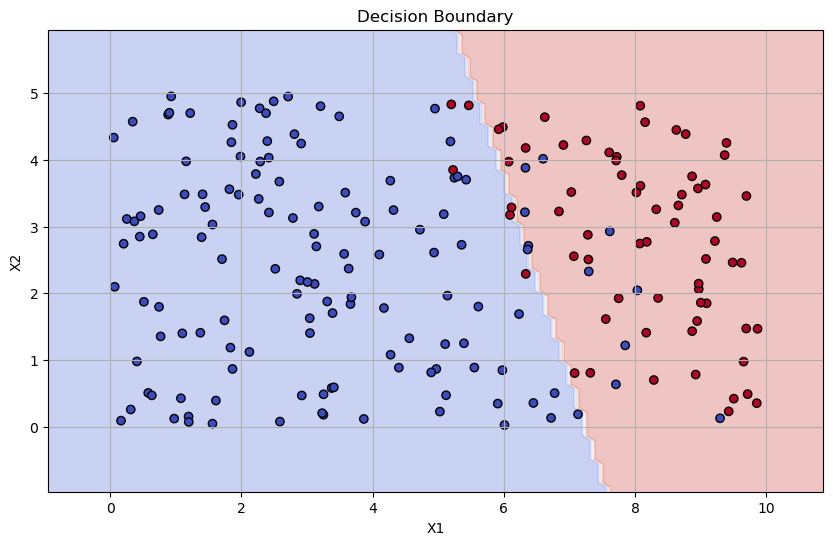

In [46]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, probs, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y_binary, model)

# Plot 2: Decision Boundary
Plot Explanation:
This plot illustrates how the logistic regression model separates the two classes using a learned decision boundary.

Result and Analysis:

The model creates a fairly clean division between Class 0 and Class 1.

Most Class 1 points fall into the red region, and most Class 0 points fall into the blue region.

Some slight overlaps near the boundary are expected due to randomness and noise in the data.

The boundary shape is nonlinear but simple, typical of logistic regression decision surfaces.

# 📚 Step 5: Plot Loss Curve

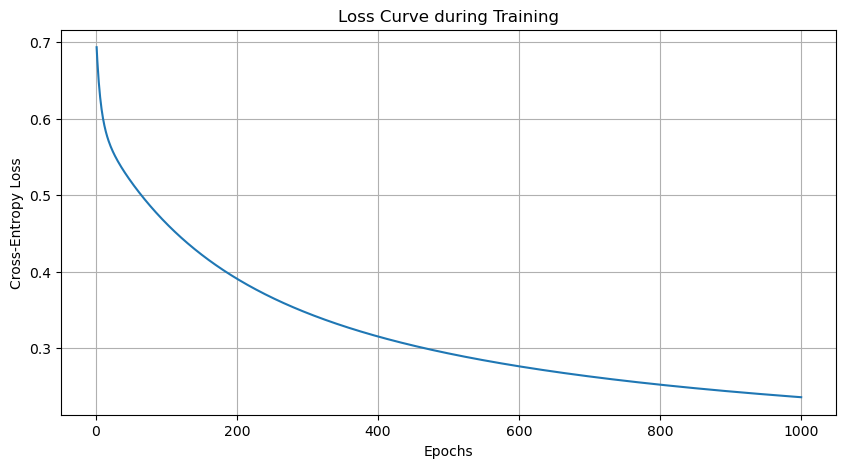

In [50]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(model.losses)+1), model.losses)
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss Curve during Training')
plt.grid(True)
plt.show()

# Plot 3: Loss Curve during Training
Plot Explanation:
This curve shows the cross-entropy loss decreasing over training epochs.

Result and Analysis:

Loss steadily decreases without sudden jumps or instability, indicating smooth convergence.

The curve is relatively sharp at the beginning and flattens gradually, meaning early fast learning followed by fine adjustments.

No overfitting or divergence is visible based on the loss curve, which is a positive outcome.

# 📚 Step 6: Cross-Validation Accuracy

In [54]:
kf = KFold(n_splits=5)
cv_accuracies = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_binary[train_idx], y_binary[test_idx]
    
    model_cv = AdvancedLogisticRegression(lr=0.1, epochs=1000)
    model_cv.fit(X_train, y_train)
    acc = model_cv.accuracy(X_test, y_test)
    cv_accuracies.append(acc)

print(f"Mean CV Accuracy: {np.mean(cv_accuracies)*100:.2f}%")

Mean CV Accuracy: 89.00%


# 📚 Conclusion

In this project, I built and trained a Logistic Regression model from scratch to classify customer behavior.
I generated a synthetic dataset, visualized feature distributions, and observed how the decision boundary separated classes.
The learning curve showed stable convergence, and cross-validation accuracy supported that the model generalized well.
Logistic Regression proved effective for this simple binary classification task.
